In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vikra\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




* Data Description The Haberman 's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Attribute Information:

    * Age of patient at time of operation (numerical)
    * Patient's year of operation (year - 1900, numerical)
    * Number of positive axillary nodes detected (numerical)
    * Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years



In [2]:
data = pd.read_csv('haberman.csv')

In [3]:
data.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
data['survival_status_after_5_years'] = data['survival_status_after_5_years'].map({1:'survive',2:'not survived'})

In [5]:
data.shape

(306, 4)

Here we have 4 columns and 306 rows of the dataset

In [6]:
data.describe()

,age,year_of_treatment,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


* count shows the how many row in each column we have.
* mean shows the central tendancy of each column.
* std is short form of standard deviation and tells us that how spread dataaround the mean value.
* min value is the minimum of each columns.
* 25% percentile means 25% value of data less than 25% percentile value.
* 50% percentile means 50% value of data less than 50% percentile value.
* 75% percentile means 75% value of data less than 75% percentile value.
* max value is maximum value of each column.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            306 non-null    int64 
 1   year_of_treatment              306 non-null    int64 
 2   positive_lymph_nodes           306 non-null    int64 
 3   survival_status_after_5_years  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


So we can say every value is int type.

# Univariate Analysis

In [8]:
plt.rcParams['figure.figsize'] = 11,5
plt.rcParams['axes.titlesize'] = 20

C:\Users\vikra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


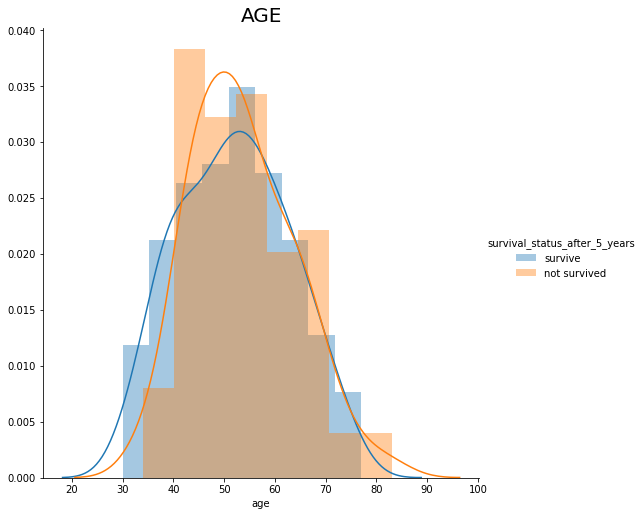

In [9]:
sns.FacetGrid(data,hue = 'survival_status_after_5_years',size = 7).map(sns.distplot,'age').add_legend()
plt.title("AGE")
plt.show()

* There is no matter what's your age.

C:\Users\vikra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


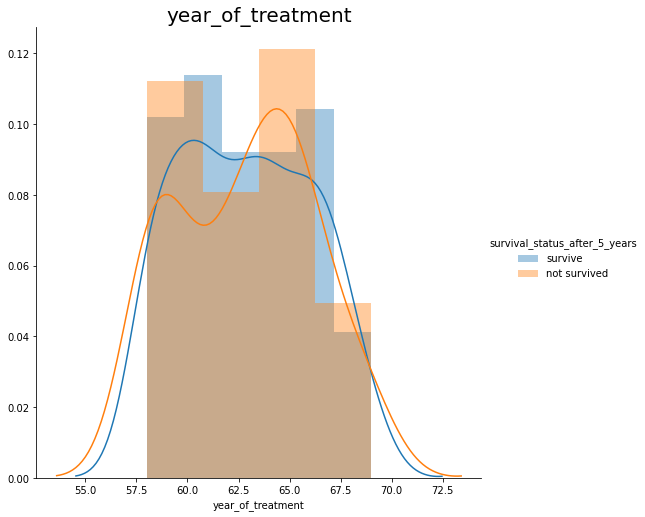

In [10]:
sns.FacetGrid(data,hue = 'survival_status_after_5_years',size = 7).map(sns.distplot,'year_of_treatment',).add_legend()
plt.title("year_of_treatment")
plt.show()

* after analyzing above graph we can say year 58 to year 60 more people survive than not survive and year 62 to 66 more people not survive than survive.

C:\Users\vikra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


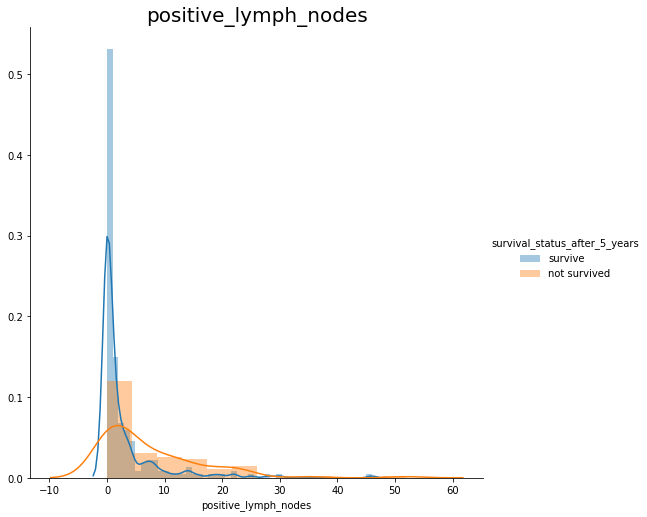

In [11]:
sns.FacetGrid(data,hue = 'survival_status_after_5_years',size = 7).map(sns.distplot,'positive_lymph_nodes',).add_legend()
plt.title("positive_lymph_nodes")
plt.show()

* This column is more important column in the data.
* we can say which people they  have positive lymph node is 0 then they have more chance to survive.

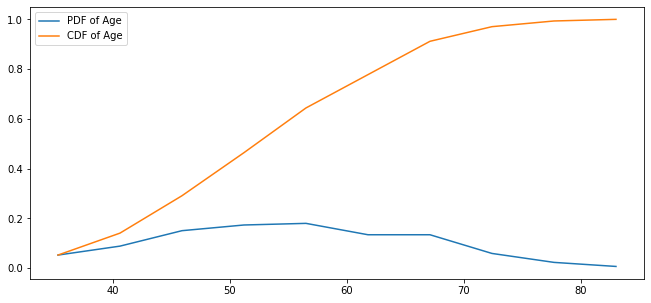

In [12]:
counts,bin_edges = np.histogram(data['age'],bins = 10,density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = "PDF of Age")
plt.plot(bin_edges[1:],cdf,label = 'CDF of Age')
plt.legend()
plt.show()

* Here we can say that age column spreadness is very high.
* we can assume by this curve that 90% of value below the age of 70.

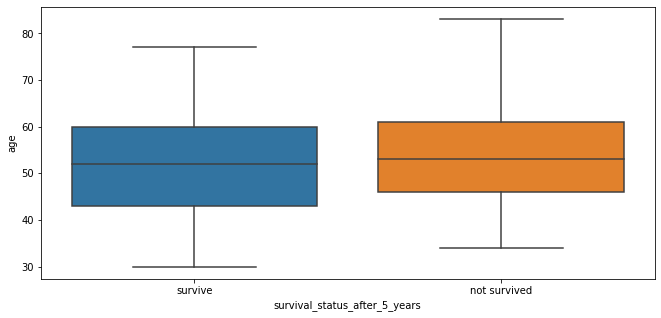

In [13]:
sns.boxplot(x='survival_status_after_5_years',y='age', data=data)
plt.show()

<AxesSubplot:xlabel='survival_status_after_5_years', ylabel='age'>

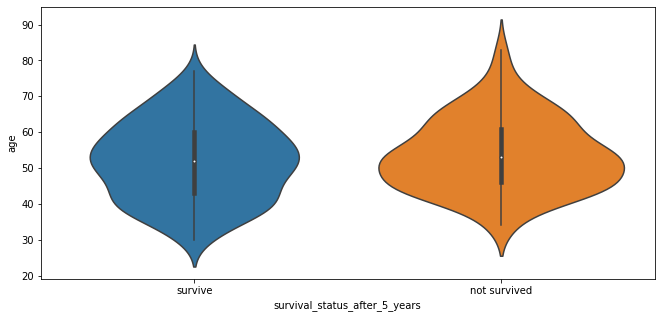

In [14]:
sns.violinplot(x = 'survival_status_after_5_years', y = 'age',data = data)

* By the age data veri difficult to distinguish which person survive or not survive.
* Here we can say that age 44 to age 60,50% of people are survive here.and age 46 to age 61,50% of people are not survive.

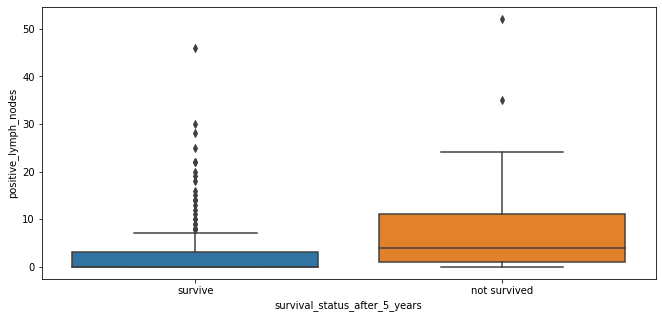

In [15]:
sns.boxplot(x='survival_status_after_5_years',y='positive_lymph_nodes', data=data)
plt.show()

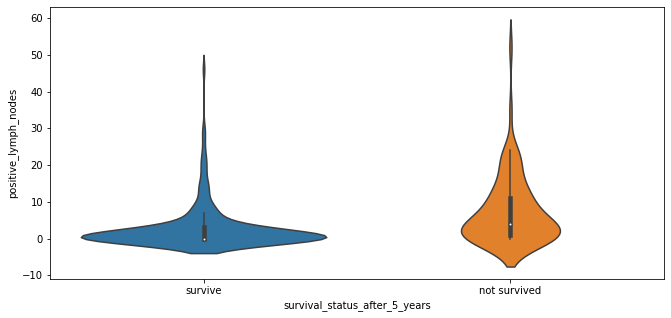

In [16]:
sns.violinplot(x = 'survival_status_after_5_years',y = 'positive_lymph_nodes',data = data)
plt.show()

* according to this which person have 0 to less than 5 postive lymph node that have more chances to survive rathar than not survive.
* Almost 80% of the patients have less than or equal to 5 positive lymph nodea.
* The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

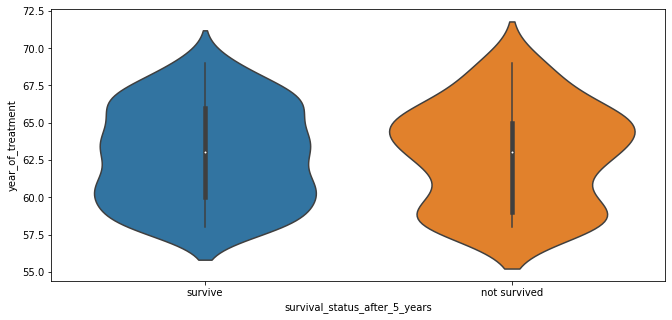

In [17]:
sns.violinplot(x = 'survival_status_after_5_years',y = 'year_of_treatment',data = data)
plt.show()

* year of treatment is not a good feature to tell us that which person survive or not.

# Bivariate Analysis

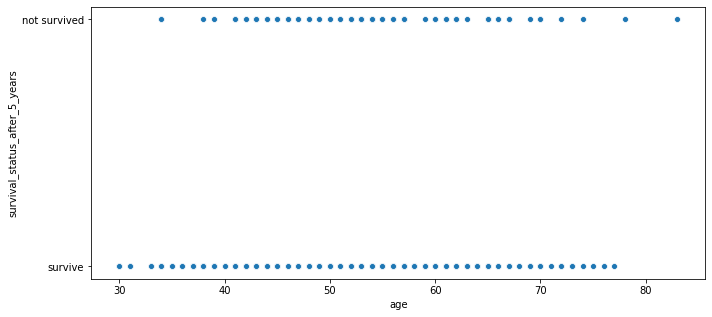

In [18]:

sns.scatterplot(x = data['age'],y = data['survival_status_after_5_years'])
plt.show()

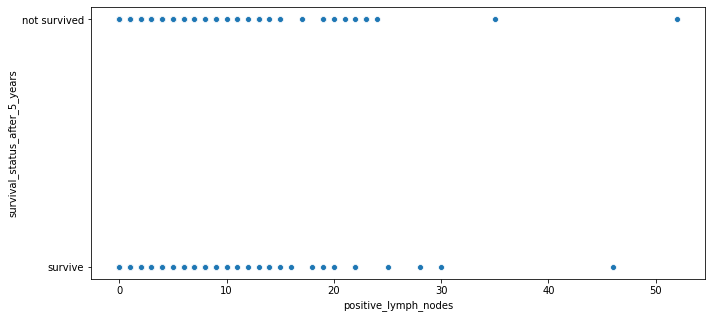

In [19]:
sns.scatterplot(x = data['positive_lymph_nodes'],y = data['survival_status_after_5_years'])
plt.show()

# Multivariate Analysis

C:\Users\vikra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


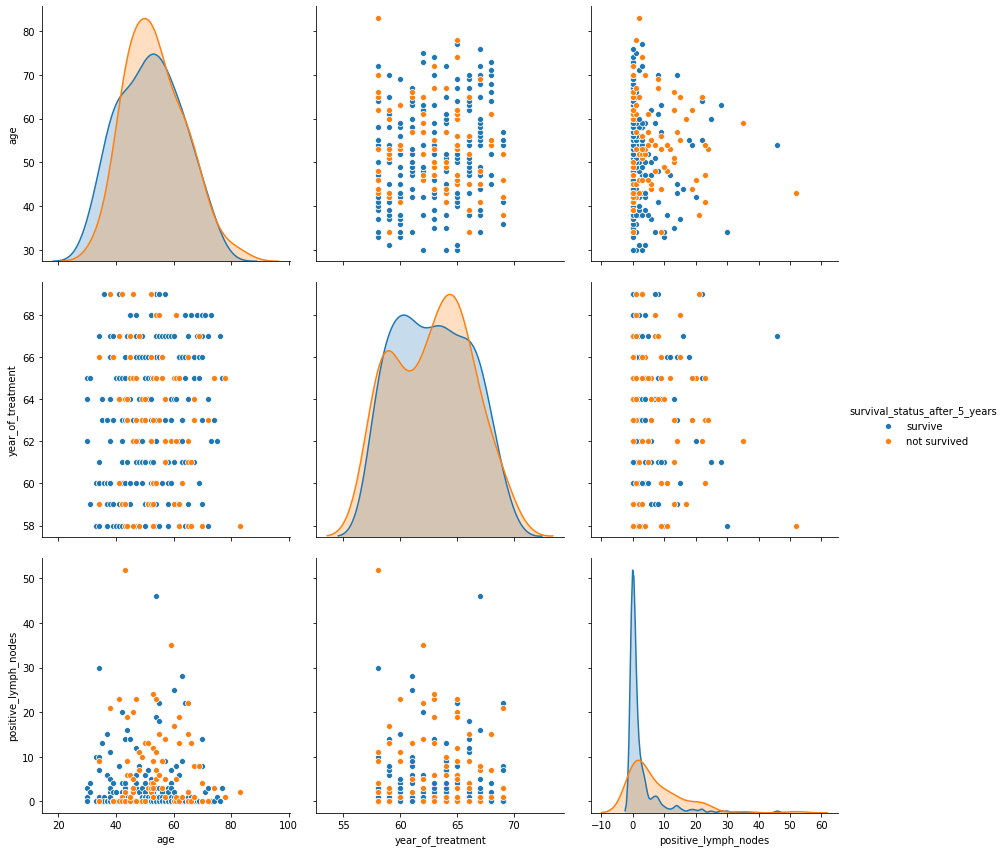

In [20]:
sns.pairplot(data, hue='survival_status_after_5_years', size=4)
plt.show()

* By scattering the data points between year_of_treatment and positive_lymph_nodes, we can see the better seperation between the two clases than other scatter plots.

# End Of The NoteBook